In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import datetime
import datetime as dt

#Import Matplotlib and seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import sklearn models 
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# Set pandas display options so as to view all the columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Part 1: The initial look at the data

- The dataset includes 3818 unique listings provided by 2751 hosts in Seattle. Nevetheless, more than 30% of the listing prices are missing.

- Many features contained in the listings.csv file have null entries.

- We need to perform data wrangling before using the features in the listing file to analyze and predict Airbnb listing price in Seattle.

In [3]:
# Read the csv files into dataframes
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [4]:
# A quick look at the calendar dataset
calendar.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [5]:
# How many unique listings in total?
n_listing_id = len(calendar.listing_id.unique())
print('calendar.csv contains {} unique listings.'.format(n_listing_id))

calendar.csv contains 3818 unique listings.


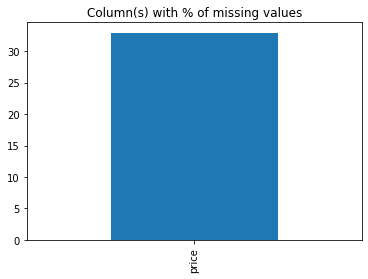

<Figure size 576x360 with 0 Axes>

In [6]:
# Which column has missing data?
calendar_col_prop_na = pd.DataFrame(calendar.isnull().mean(axis=0) * 100, columns = ['nan']);
calendar_col_prop_na[calendar_col_prop_na > 0].dropna().plot.bar(legend=None, title='Column(s) with % of missing values');
plt.figure(figsize=[8, 5]);

In [7]:
# A quick look at the listings dataset
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [8]:
listings.shape

(3818, 92)

In [9]:
# What columns are included in the listings dataset?
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [10]:
n_hosts = len(listings.host_id.unique())
n_listings= len(listings.id.unique())
print('listings.csv contains {} unique listings provided by {} hosts.'.format(n_listings, n_hosts))

listings.csv contains 3818 unique listings provided by 2751 hosts.


<Figure size 720x576 with 0 Axes>

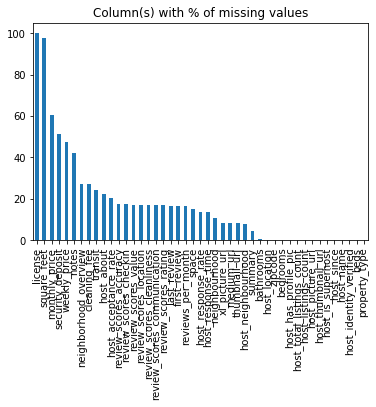

In [11]:
# Which column has missing data?
listings_col_prop_na = pd.DataFrame(listings.isnull().mean(axis=0) * 100, columns = ['nan'])
plt.figure(figsize=[10, 8]);
listings_col_prop_na[listings_col_prop_na > 0].dropna().sort_values(by=['nan'], ascending=False).plot.bar(legend=None, title='Column(s) with % of missing values');

In [12]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [14]:
n_reviews = len(reviews.id.unique())
n_reviewers = len(reviews.reviewer_id.unique())
print('reviews.csv containts {} reviews given by {} unique reviewers.'.format(n_reviews, n_reviewers))

reviews.csv containts 84849 reviews given by 75730 unique reviewers.


<Figure size 576x360 with 0 Axes>

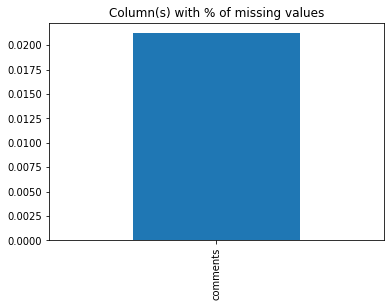

In [15]:
# Which column has missing data?
reviews_col_prop_na = pd.DataFrame(reviews.isnull().mean(axis=0) * 100, columns = ['nan'])
plt.figure(figsize=[8, 5]);
reviews_col_prop_na[reviews_col_prop_na > 0].dropna().sort_values(by=['nan'], ascending=False).plot.bar(legend=None, title='Column(s) with % of missing values');

###  Business Questions 

- What is the distribution of price for listings in Seattle?
- Is there any pattern in the listing price? Which neighborhood is the most expensive? When is the peak season?
- What features have a high level of correlation with listing price?
- Can we use a selected set of features to predict price?


### Data Wrangling & EDA

#### Price Overview

In [16]:
# Remove rows with missing listing price in calendar.csv
calendar.dropna(subset=['price'], inplace=True)
calendar.reset_index(inplace=True, drop = True)
# Check whether there is still null value
calendar.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [17]:
calendar['price'] = calendar['price'].apply(lambda x: str(x).replace("$", "").replace(",", ""))
calendar['price'] = calendar['price'].astype('float')

In [18]:
min_px = calendar.price.min()
max_px = calendar.price.max()
median_px = calendar.price.median()
mean_px = calendar.price.mean()
print('The lowest listing price is {:04.2f}, and the highest is {:04.2f}. The mean and median are {:04.2f} and {:06.2f} respectively.'.format(min_px, max_px, median_px, mean_px))

The lowest listing price is 10.00, and the highest is 1650.00. The mean and median are 109.00 and 137.94 respectively.


In [19]:
#Check the statistics for listing price 
calendar.price.describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

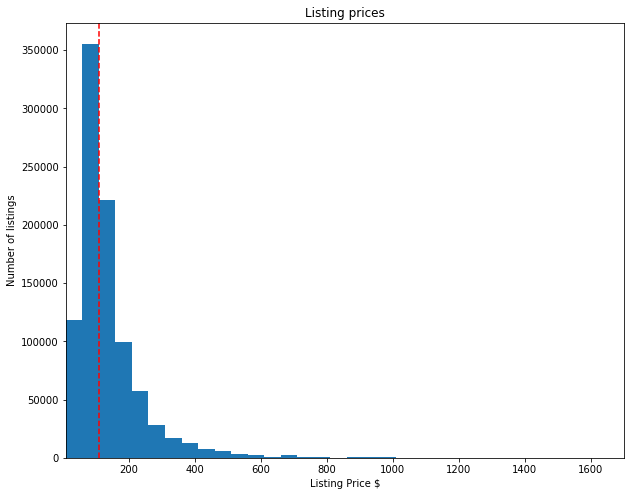

In [20]:
#plot the distribution of listing price
plt.figure(figsize=[10, 8]);
bin_edges=np.arange(min_px,max_px+50,50)
plt.hist(calendar.price,bin_edges)
plt.xlabel('Listing Price $')
plt.ylabel('Number of listings')
plt.xlim([min_px,max_px+50])
plt.title('Listing prices')
plt.axvline(x=median_px, color="r", linestyle="--")
plt.show();

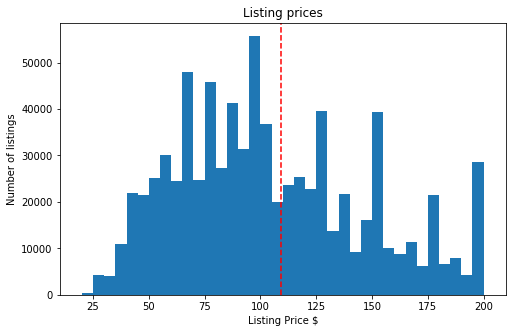

In [21]:
#Since there is a long tail at the right. We zoom in to look at prices below 200 (more than 75% of the listing prices are below 200)
plt.figure(figsize=[8, 5])
bin_edges=np.arange(min_px,200+5,5)
plt.hist(calendar.price,bin_edges)
plt.xlabel('Listing Price $')
plt.ylabel('Number of listings')
plt.xlim([min_px,210])
plt.title('Listing prices')
plt.axvline(x=median_px, color="r", linestyle="--")
plt.show();

**The majority of accomodations cost between USD50-200, with the highest at USD1,650 and the lowest at USD10.**

#### Question 1: When is the peak season in Seattle?

In order to answer this question, we need to find out:

- How many listings in a given month or a given weekday?
- How prices change from time to time?

In [22]:
# Parse the date`
calendar['date'] = pd.to_datetime(calendar['date'])

# Extract the month
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar.month.value_counts()

12    87061
3     83938
10    82438
11    81780
5     79971
9     77246
6     77244
8     76347
4     76037
7     74222
2     73321
1     64937
Name: month, dtype: int64

In [23]:
# Extract the day name
calendar['day'] = calendar.date.dt.day_name()


day_of_week = pd.api.types.CategoricalDtype(ordered = True,
                                                categories =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])

calendar['day'] = calendar['day'].astype(day_of_week)

calendar.day.value_counts()

Monday       135800
Sunday       133615
Tuesday      133407
Wednesday    133375
Thursday     132968
Friday       132803
Saturday     132574
Name: day, dtype: int64

<Figure size 720x360 with 0 Axes>

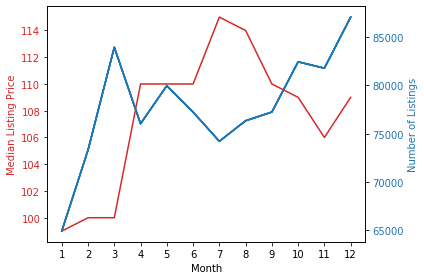

In [24]:
# Plot the median price and number of listings by month

med_price_by_month = calendar.groupby(['month']).price.median() # Obtain the median price per month

n_by_month = calendar.groupby(['month']).count() # Obtain the total number of listings per month

ind = n_by_month.index

plt.figure(figsize=(10,5))
fig, ax1 = plt.subplots();

color = 'tab:red';
ax1.set_xlabel('Month');
ax1.set_ylabel('Median Listing Price', color=color);
ax1.plot(ind, med_price_by_month, color=color);
ax1.tick_params(axis='y', labelcolor=color);

plt.xticks(np.arange(min(ind), max(ind)+1, 1.0))

ax2 = ax1.twinx();  # instantiate a second axes that shares the same x-axis

color = 'tab:blue';
ax2.set_ylabel('Number of Listings', color=color);  # we already handled the x-label with ax1
ax2.plot(ind, n_by_month, color=color);
ax2.tick_params(axis='y', labelcolor=color);

fig.tight_layout(); # otherwise the right y-label is slightly clipped
plt.show();

**Not surprisingly, median listing prices are higher during summer (July & August). It is interesting to note that the supply of accommodations is quite limited at the same period. There are fewer listings in July and August compared to the rest of the year.**

<Figure size 720x360 with 0 Axes>

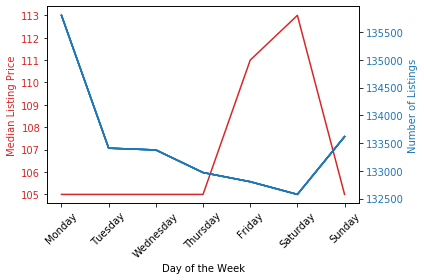

In [25]:
# Plot the median price and number of listings by day

med_price_by_day = calendar.groupby(['day']).price.median() # Obtain the median price per day

n_by_day = calendar.groupby(['day']).count() # Obtain the total number of listings per day

ind_d = n_by_day.index

plt.figure(figsize=(10,5));
fig, ax1 = plt.subplots();

color = 'tab:red';
ax1.set_xlabel('Day of the Week');
ax1.set_ylabel('Median Listing Price', color=color);
ax1.plot(ind_d, med_price_by_day, color=color);
ax1.tick_params(axis='y', labelcolor=color);

ax1.set_xticklabels(ind_d, rotation = 45);

ax2 = ax1.twinx();  # instantiate a second axes that shares the same x-axis

color = 'tab:blue';
ax2.set_ylabel('Number of Listings', color=color);  # we already handled the x-label with ax1
ax2.plot(ind_d, n_by_day, color=color);
ax2.tick_params(axis='y', labelcolor=color);

fig.tight_layout(); # otherwise the right y-label is slightly clipped
plt.show();

**Saturday is the most expensive, followed by Friday. It makes senses intuitively...**

#### Clean up  the listing dataset
- Drop the columns irrelevant to our analysis 
- Combine with the calendar dataset

In [26]:
#Select columns to drop
columns_to_drop = ['host_id','host_location','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'square_feet', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names',
                  'reviews_per_month','price', 'host_verifications', 'amenities']

#Make a copy of the listing dataset
df_listings = listings.copy()

#Drop columns
df_listings.drop(columns = columns_to_drop, inplace=True)

#Check the dataframe
df_listings.head(3)

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,241032,2011-08-11,within a few hours,96%,100%,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2
1,953595,2013-02-21,within an hour,98%,100%,t,6.0,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,1,$0.00,2,90,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6
2,3308979,2014-06-12,within a few hours,67%,100%,f,2.0,t,t,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,10,$25.00,4,30,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2


In [27]:
df_listings.isnull().sum()

id                                    0
host_since                            2
host_response_time                  523
host_response_rate                  523
host_acceptance_rate                773
host_is_superhost                     2
host_listings_count                   2
host_has_profile_pic                  2
host_identity_verified                2
neighbourhood_group_cleansed          0
property_type                         1
room_type                             0
accommodates                          0
bathrooms                            16
bedrooms                              6
beds                                  1
bed_type                              0
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating                647
review_scores_accuracy              658
review_scores_cleanliness           653


In [28]:
# Imput the missing values with the mode
mode_since = df_listings['host_since'].mode()[0]

df_listings['host_since'].fillna(mode_since, inplace=True)

# Convert the datatype to datetime
df_listings['host_since'] = pd.to_datetime(df_listings['host_since']) 
df_listings['host_since_year'] = df_listings['host_since'].dt.year

In [29]:
# Convert the datatype to float, and fill the null values with the median

def extract_rate_and_fillna(data):
    
    data = data.str.extract(r'([0-9]+)').astype('float')
    data = data.fillna(data.median())

    return data 


df_listings['host_response_rate'] = extract_rate_and_fillna(df_listings['host_response_rate'])
df_listings['host_acceptance_rate'] = extract_rate_and_fillna(df_listings['host_acceptance_rate'])

In [30]:
# Impute the missing values with the mode or the median

fillna_with_mode_cols = ['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
                        'property_type']

fillna_with_median_cols = ['host_listings_count', 'bathrooms', 'bedrooms', 'beds' ]

for col in fillna_with_mode_cols:
    df_listings[col].fillna(df_listings[col].mode()[0], inplace=True)

for col in fillna_with_median_cols:
    df_listings[col].fillna(df_listings[col].median(), inplace=True)

In [31]:
# Change pivote_response_time to numeric values
response_dict = {'within an hour': 1, 'within a few hours': 5, 'within a day': 24, 'a few days or more': 72}

for k in response_dict:
    df_listings['host_response_time'] = df_listings.host_response_time.replace(k, response_dict[k])

In [32]:
# Select all the reviews columns with missing values
reviews_columns = ['review_scores_rating', 'review_scores_rating', 'review_scores_accuracy',
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                   'review_scores_location', 'review_scores_value']
# Change the datatype to float and fill the null values with the median
for col in reviews_columns:
    df_listings[col] = df_listings[col].astype('float')
    df_listings[col].fillna(df_listings[col].median(), inplace=True)

In [33]:
# Check whether there is still any null value. 
df_listings.isnull().any().sum()

0

In [34]:
# Stripe the dollar sign of the extra_people column
df_listings['extra_people'] = df_listings.extra_people.str.replace('$', '')

In [35]:
# Extract the number of reviews given to each listing
df_reviews = pd.DataFrame(data = reviews.groupby('listing_id').id.count())
df_reviews.rename(columns={"id": "num_reviews"}, inplace=True)
df_reviews.head()

,num_reviews
listing_id,
4291,35
5682,297
6606,52
7369,40
9419,79


In [36]:
#Rename the column
df_listings.rename(columns ={'id': 'listing_id'}, inplace=True)

# Merge the number of reviews with the listing dataset
df = df_listings.merge(df_reviews, on = 'listing_id')

In [37]:
# Merge the data
df_clean = calendar.merge(df, on = 'listing_id')
df_clean.drop(columns=['available'], inplace=True)
df_clean.rename(columns={'price_y': 'price'}, inplace=True)

#### Question 2: How do listing prices differ from one neighbourhood to the other?

- Which neighbourhood is the most expensive? Which is the cheapest?
- How big is the range?

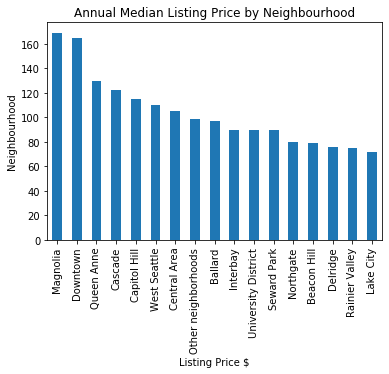

In [38]:
median_price_by_neighbourhood = df_clean.groupby('neighbourhood_group_cleansed').price.median().sort_values(ascending=False)
median_price_by_neighbourhood.plot.bar();

plt.title('Annual Median Listing Price by Neighbourhood');
plt.xlabel('Listing Price $');
plt.ylabel('Neighbourhood');

**Magnolia and Downtown are the most expensive areas and the median listing price is above USD160 per night. Lake City is the cheapest with the median daily rate below USD80. In general, two nights in Lake City is one night in Magnolia!** 

> #### Question 3: What features have a high level of correlation with listing price?

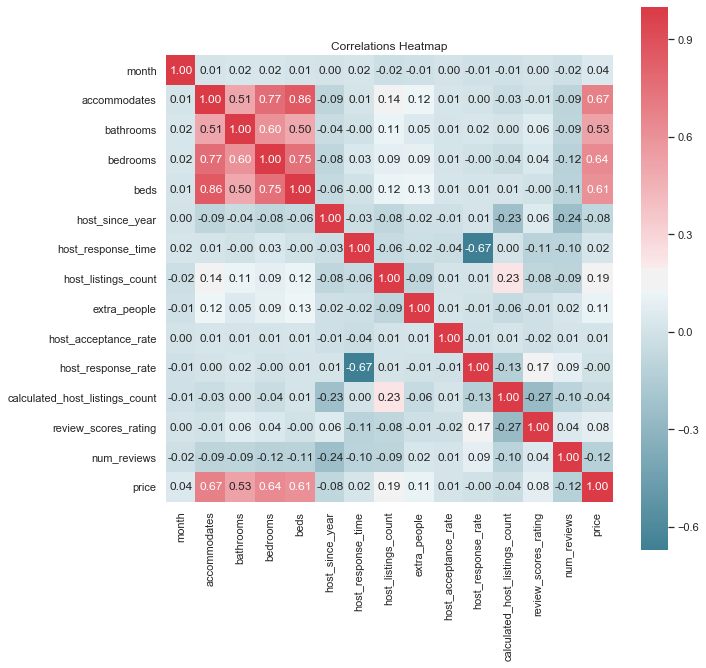

In [39]:
# Change columns with boolean values to 1/0 so as to calculate the correl matrix
def change_to_bool(Series):
    Series = Series.replace("f", 0)
    Series = Series.replace("t", 1)
    Series = Series.astype('bool')
    return Series

bool_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
             'require_guest_profile_picture', 'require_guest_phone_verification','instant_bookable']

for col in bool_cols:
    df_clean[col] = change_to_bool(df_clean[col])

# Select columns of interest
num_cols = ['month', 'accommodates', 'bathrooms','bedrooms','beds','host_since_year', 'host_response_time',
        'host_listings_count', 'extra_people', 'host_acceptance_rate', 'host_response_rate',
        'calculated_host_listings_count','review_scores_rating','num_reviews', 'price']

# Convert the datatype to numeric
for col in num_cols:
    df_clean[num_cols] = df_clean[num_cols].astype('float')

corrs = np.corrcoef(df_clean[num_cols].values.T)

# Find out correlation between columns and plot
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set image size
sns.set(rc={'figure.figsize':(10,10)})


sns.heatmap(corrs, cmap=cmap, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = num_cols, xticklabels = num_cols).set_title('Correlations Heatmap');

# source: https://www.kaggle.com/aleksandradeis/airbnb-seattle-reservation-prices-analysis/notebook

- **Median Price has a high or moderate level of correlation with the size factors such as the number of people it can accomodate, number of beds/bedrooms and bathrooms.**

- **Whether the host is the superhost only has a low level of correlation with the review scores.**

### Predict listing price with machine learning models

In [40]:
# Convert categorical variables to dummies

cat_cols = df_clean.select_dtypes(include=['object']).columns
    
for col in cat_cols:
    df_clean = pd.concat([df_clean.drop(col, axis=1), pd.get_dummies(df_clean[col],
                                                              prefix=col, prefix_sep='_',drop_first=True)], axis=1)

#drop listing_id and year columns
df_clean = df_clean.drop(columns = ['listing_id', 'date','day','host_since','calculated_host_listings_count'])

In [44]:
# Split the dataset into training and test sets
df = df_clean.copy()

# I will use a much smaller sample as a proof of concept. Otherwise it will take days to complete on my laptop
df_sample = df.sample(frac=1)

In [45]:
X = df_sample.drop(columns = ['price'])
y = df_sample[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [46]:
# Train the SVM model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1).fit(X_train, y_train.values.ravel())

In [48]:
# Make predications and calculate the scores 
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_preds)
mse_test = mean_squared_error(y_test, y_test_preds)

r2_train = r2_score(y_train, y_train_preds)
r2_test = r2_score(y_test, y_test_preds)

print('MSE is {:.2f} for the training set and {:.2f} for the test set.'.format(mse_train, mse_test))
print('R^2 is {:2f} for the trainig set and {:.2f} for the test set.'.format(r2_train, r2_test))

MSE is 201.68 for the training set and 214.11 for the test set.
R^2 is 0.982226 for the trainig set and 0.98 for the test set.


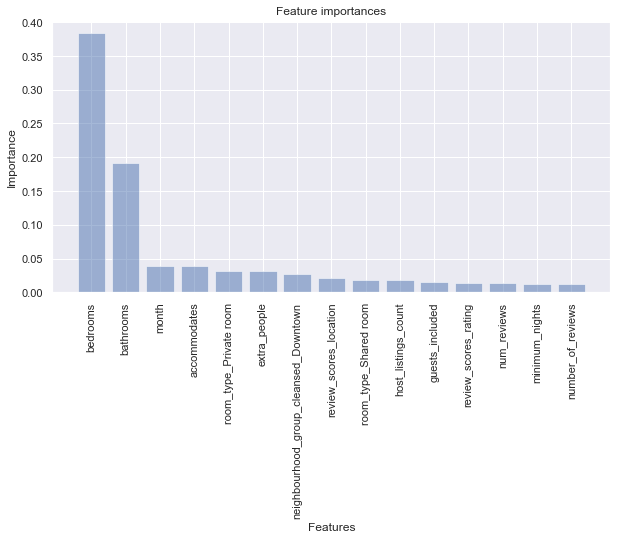

In [58]:
def feature_imp(n):
    '''get the feature importance and plot the top nth features 
    '''
    headers = ["name", "importance"]
    values = sorted(zip(X_train.columns, abs(forest.feature_importances_)))
    forest_feature_importances = pd.DataFrame(values, columns = headers)
    forest_feature_importances = forest_feature_importances.sort_values(by = ['importance'], ascending = False)

    features = forest_feature_importances['name'][:n]
    y_pos = np.arange(len(features))
    importance = forest_feature_importances['importance'][:n]

    #plot feature importances
    plt.figure(figsize=(10,5))
    plt.bar(y_pos, importance, align='center', alpha=0.5)
    plt.xticks(y_pos, features, rotation='vertical')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title('Feature importances')

    plt.show()
    return None

feature_imp(15)

# Courtesy of Aleksandra Deis,
# https://www.kaggle.com/aleksandradeis/airbnb-seattle-reservation-prices-analysis/notebook